In [1]:
from google.colab import files
uploaded = files.upload()  # This will open a dialog to upload the CSV


Saving netflix_titles.csv to netflix_titles.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix_titles.csv')  # Use the exact file name if it's different

# Show the first 5 rows to see what the data looks like
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Get basic information about the dataset
df.info()

# Show some summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
# Check for missing values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
df = df.dropna()  # Drops any rows with missing values


In [8]:
!pip install matplotlib seaborn

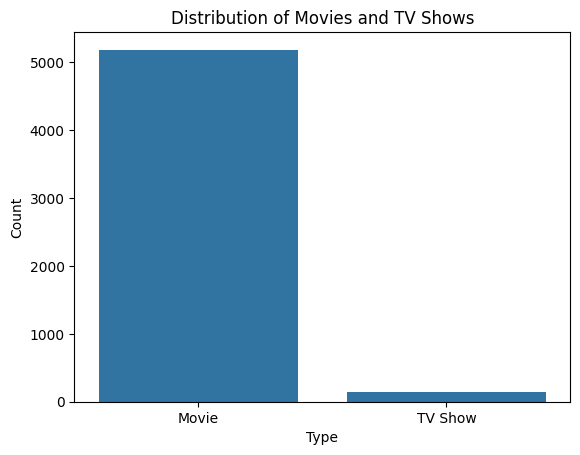

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of movies and TV shows
type_counts = df['type'].value_counts()

# Plot the counts
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [10]:
# Count the occurrences of each genre
genre_counts = df['genre'].value_counts().head(10)  # Top 10 genres

# Plot the counts of genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


KeyError: 'genre'

In [11]:
# Check the column names
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [12]:
print(df['listed_in'].head())

7     Dramas, Independent Movies, International Movies
8                         British TV Shows, Reality TV
9                                     Comedies, Dramas
12                        Dramas, International Movies
24     Comedies, International Movies, Romantic Movies
Name: listed_in, dtype: object


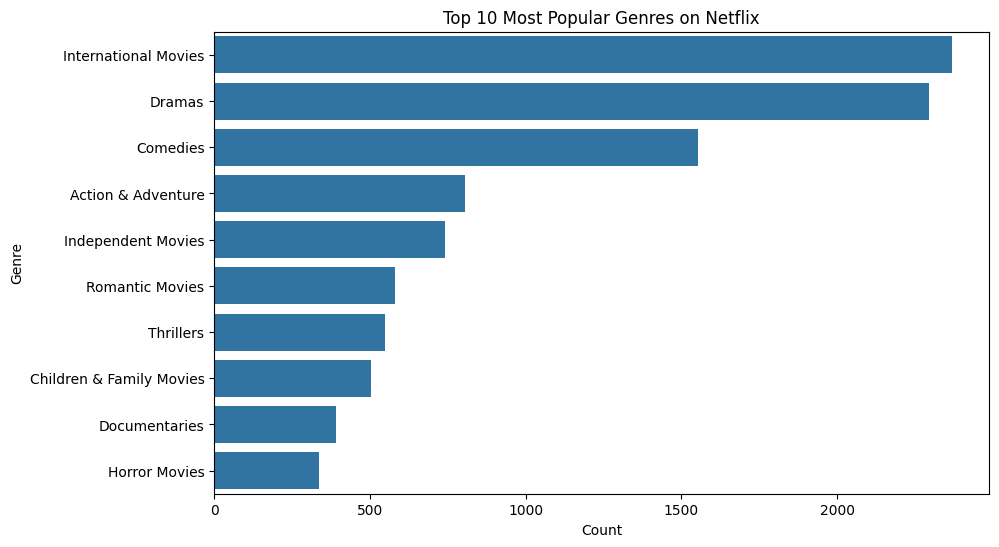

In [13]:
# Split the 'listed_in' column by commas, remove spaces, and explode into individual genres
genres = df['listed_in'].str.split(',').explode().str.strip()

# Count the occurrences of each genre
genre_counts = genres.value_counts().head(10)

# Plot the top 10 most popular genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
